# Visualizing Data

*A picture is worth a thousand words.*

A fundamental part of the data scientist’s toolkit is data visualization. The two primary uses for data visualization are:
- To *explore* data
- To *communicate* data

## matplotlib

We will primarily be using the `matplotlib` library to produce visualizations throughout the semester. It's widely used and suitable for simple bar charts, line charts, scatterplots, etc. It may not be a good choic for producing elaborate interactive visualizations.

Depending on how you installed Python, you may need to install the `matplotlib` library first. If you are using Jupyter Notebook, you may use the following command to install it within the notebook.

In [2]:
!pip install matplotlib
# After initial installation, be sure to restart the Kernel (top meue, "Kernel" -> "Restart")

Alternatively, you may install the package through through anaconda prompt/command prompt/terminal/shell using one of the following commands:

`python -m pip install matplotlib`

`pip install matplotlib`

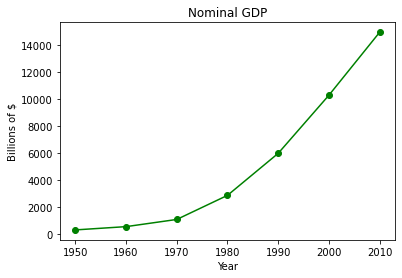

In [3]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# add a title
plt.title("Nominal GDP")

# add a label to the y-axis
plt.ylabel("Billions of $")

# add a label to the x-axis
plt.xlabel("Year")

# optionally, save the figure to hard disk. Must create the 'im' directory first.
# TIP: savefig() must come before show(), because show(), internally, clears the figure after it has been shown on the screen
# plt.savefig('im/viz_gdp.png')
plt.show()

## Bar Charts

A bar chart is a good choice when you want to show how some quantity varies among some *discrete* set of items.

The figure generated by the following code show how many Academy Awards were won by each of a variety of movies:

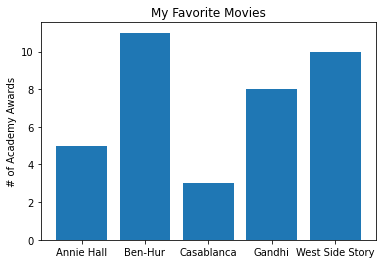

In [4]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# plot bars with left x-coordinates [0, 1, 2, 3, 4], heights [num_oscars]
plt.bar(movies, num_oscars)

plt.title("My Favorite Movies")     # add a title
plt.ylabel("# of Academy Awards")   # label the y-axis

# plt.savefig('im/viz_movies.png')
plt.show()

A bar chart can also be a good choice for plotting histograms of bucketed numeric values.

The figure produced by the following code can be used to visually explore how the values are distributed:

Counter({80: 4, 90: 3, 70: 3, 0: 2, 60: 1})


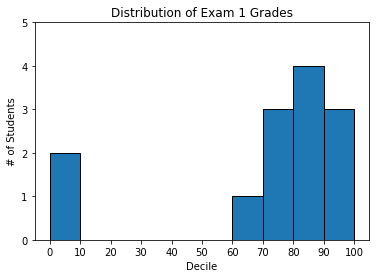

In [5]:
from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# Bucket grades by decile, but put 100 in with the 90s
# NOTE: // is the integer division/floor division operator
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)

print(histogram)

# Note that we shift the bar right by 5 because we want, say, the “60” bar (which corresponds to the decile 60–70)
# to have its center at 65 and hence occupy the correct range
plt.bar([x + 5 for x in histogram.keys()],  # Shift bars right by 5
        histogram.values(),                 # Give each bar its correct height
        10,                                 # Give each bar a width of 10
        edgecolor=(0, 0, 0))                # Black edges for each bar

# The x range of from -5 to 105 is needed to leave a little space on the left and right
plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                           # y-axis from 0 to 5

plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")

# plt.savefig('im/viz_grades.png')
plt.show()

Be careful when using `plt.axis`. When creating bar charts it is considered especially *bad for your y-axis not to start at 0*, since this is an easy way to mislead people.

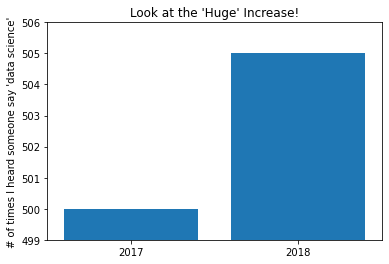

In [8]:
years = [2017, 2018]
mentions = [500, 505]


plt.bar(years, mentions)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# misleading y-axis only shows the part above 500
plt.axis([2016.5, 2018.5, 499, 506])
plt.title("Look at the 'Huge' Increase!")

# plt.savefig('im/viz_misleading_y_axis.png')
plt.show()

If more sensible axes are used, then the chart looks far less impressive (but real):

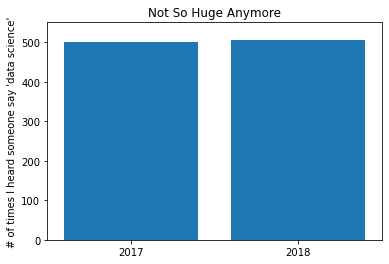

In [9]:
plt.bar(years, mentions)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

plt.axis([2016.5, 2018.5, 0, 550])
plt.title("Not So Huge Anymore")

# plt.savefig('im/viz_non_misleading_y_axis.png')
plt.show()

## Line Charts

As we saw already, we can make line charts using `plt.plot`.

These are a good choice for showing *trends*:

[0, 1, 2, 3, 4, 5, 6, 7, 8]


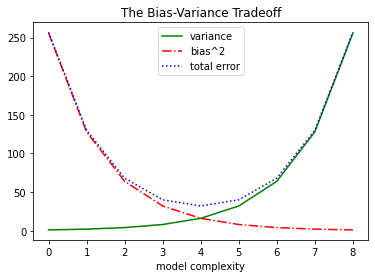

In [19]:
variance     = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error  = [x + y for x, y in zip(variance, bias_squared)]

# Recall that `enumerate` generates (index, value) pairs, here we just want the index 
xs = [i for i, _ in enumerate(variance)]
print(xs)

# We can make multiple calls to plt.plot
# to show multiple series on the same chart
# the 3rd argument is for format string, 'g-' is green solid line, 'r-.' is red solit-dash line, 'b:' is blue dotted line
plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

# Because we've assigned labels to each series,
# we can get a legend for free (loc=9 means "top center")
plt.legend(loc=9)
plt.xlabel("model complexity")
#plt.xticks([]) # no x-axis needed
plt.title("The Bias-Variance Tradeoff")

# plt.savefig('im/viz_line_chart.png')
plt.show()

## Scatterplots

A scatterplot is the right choice for visualizing the relationship between two paired sets of data.

The following example illustrates the relationship between the number of friends your users have (e.g., on Facebook) and the number of minutes they spend on the site every day:

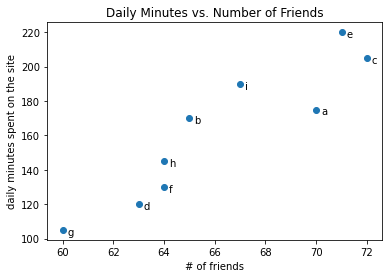

In [21]:
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
        xy=(friend_count, minute_count), # Put the label with its point
        xytext=(5, -5),                  # but slightly offset (5 pts right on the x coordinate, 5 pts down on the y coordiante)
        textcoords='offset points')      # 'point' is a type of display measurement, alternatively, 'offset pixels' may be used

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")

# plt.savefig('im/viz_scatterplot.png')
plt.show()

If you’re scattering comparable variables (in this case, two lists of test grades), you might get a misleading picture if you let matplotlib choose the scale:

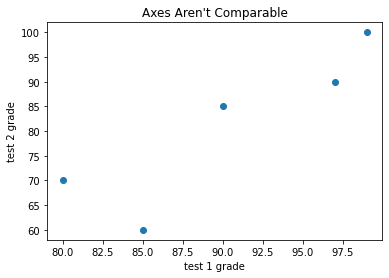

In [22]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")

# plt.savefig('im/viz_scatterplot_axes_not_comparable.png')
plt.show()

If we include a call to `plt.axis("equal")`, the plot more accurately shows that most of the variation occurs on test 2.

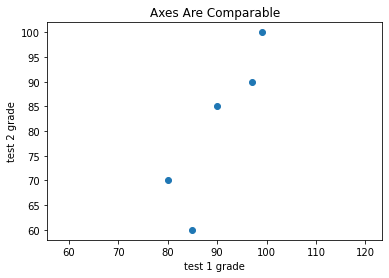

In [24]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Are Comparable")
plt.axis("equal")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")

#plt.savefig('im/viz_scatterplot_axes_comparable.png')
plt.show()

## Further exploration in matplotlib

The [matplotlib Gallery](https://matplotlib.org/gallery.html) will give you a good idea of the sorts of things you can do
with matplotlib (and how to do them).